### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Loading Dataset

In [2]:
# # Loading the dataset and perform splitting
# data_list = []
# labels_list = []
# classes_list = 43

# imgs_path = "../input/gtsrb-german-traffic-sign/Train"
# for i in range(classes_list):
#     i_path = os.path.join(imgs_path, str(i)) #0-42
#     for img in os.listdir(i_path):
#         im = Image.open(i_path +'/'+ img)
#         im = im.resize((32,32))
#         im = np.array(im)
#         data_list.append(im)
#         labels_list.append(i)
# data = np.array(data_list)
# labels = np.array(labels_list)

In [2]:
# Opening file for reading in binary mode
#- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization
with open('D:\Project\Traffic Sign Detection\DATABASE/data0.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

train_imgs = data['x_train']
test_imgs = data['x_test']
valid_imgs = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']

In [4]:
train_labels

array([37, 27, 38, ..., 11, 14, 30], dtype=int64)

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    plt.imshow(image1)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1


#new = augment_brightness_camera_images(image)
new = preprocess_img(image)
#plt.imshow(new)
print(new.shape)
print(cycle)

In [3]:
A = np.array(np.where(train_labels >= 18))
A = np.concatenate((A ,np.where(train_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(train_labels == 11)), axis = 1)
B = np.array(np.where(train_labels > 31))
indx = np.setdiff1d(A, B)

A = np.array(np.where(test_labels >= 18)) 
A = np.concatenate((A ,np.where(test_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(test_labels == 11)), axis = 1)
B = np.array(np.where(test_labels > 31))
indx1 = np.setdiff1d(A, B)

A = np.array(np.where(valid_labels >= 18)) 
A = np.concatenate((A ,np.where(valid_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(valid_labels == 11)), axis = 1)
B = np.array(np.where(valid_labels > 31))
indx2 = np.setdiff1d(A, B)

tri_X_train = train_imgs[indx]
tri_X_test = test_imgs[indx1]
tri_X_valid = valid_imgs[indx2]
tri_train_labels = train_labels[indx]
tri_test_labels = test_labels[indx1]
tri_valid_labels = valid_labels[indx2]

In [6]:
tri_train_labels.shape

(32368,)

In [4]:
tri_Dict = {11:0 , 13:1 , 18:2 , 19:3 , 20:4 , 21:5 , 22:6 , 23:7 , 24:8 , 25:9 , 26:10 , 27:11 , 28:12 , 29:13 , 30:14 , 31:15 }
tri_train_labels = np.vectorize(tri_Dict.get)(tri_train_labels)
tri_test_labels = np.vectorize(tri_Dict.get)(tri_test_labels)
tri_valid_labels = np.vectorize(tri_Dict.get)(tri_valid_labels)
tri_num_class = 16

In [8]:
tri_train_labels

array([11, 12, 13, ...,  2,  0, 14])

from skimage import color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48

def preprocess_img(img):
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

#     # central square crop
#     min_side = min(img.shape[:-1])
#     centre = img.shape[0]//2, img.shape[1]//2
#     img = img[centre[0]-min_side//2:centre[0]+min_side//2,
#     centre[1]-min_side//2:centre[1]+min_side//2,
#                   :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

### Image Data Preprocessing

In [10]:
tri_X_train.shape

(32368, 32, 32, 3)

In [5]:
def CV2HSV(x):
    x_train = np.zeros((x.shape[0] , x.shape[1] , x.shape[2] , 3))
    for i in range(0 , x.shape[0]):
        x_train[i] = cv2.cvtColor(x[i],cv2.COLOR_BGR2HSV)
    return x_train


In [6]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = (tri_X_train)
x_test = (tri_X_test)
x_valid = (tri_X_valid)

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 16

# One Hot Encoding
y_train = keras.utils.to_categorical(tri_train_labels, 16)
y_test = keras.utils.to_categorical(tri_test_labels, 16)
y_valid = keras.utils.to_categorical(tri_valid_labels, 16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


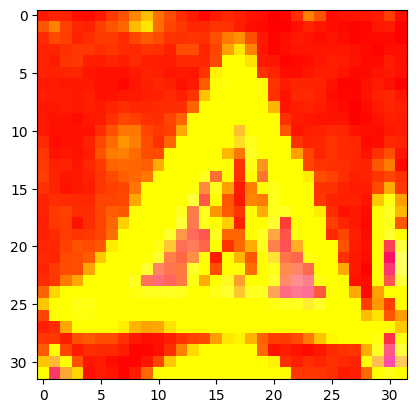

In [17]:
plt.imshow(x_train[0])

In [7]:
keras.backend.clear_session()

### LeNet Model Architecture

In [8]:
# Building the Model Architecture
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))#************
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(16, activation='softmax'))#********************
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(16, activation='softmax'))



In [9]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [22]:
print(x_train.shape , x_test.shape)

(32368, 32, 32, 3) (3510, 32, 32, 3)


In [10]:
model.fit(x_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/70
253/253 [==============================] - 11s 28ms/step - loss: 2.3804 - accuracy: 0.4301 - val_loss: 0.4229 - val_accuracy: 0.9140
Epoch 2/70
253/253 [==============================] - 6s 26ms/step - loss: 0.4818 - accuracy: 0.8685 - val_loss: 0.2065 - val_accuracy: 0.9620
Epoch 3/70
253/253 [==============================] - 6s 26ms/step - loss: 0.2578 - accuracy: 0.9284 - val_loss: 0.1912 - val_accuracy: 0.9705
Epoch 4/70
253/253 [==============================] - 7s 26ms/step - loss: 0.1727 - accuracy: 0.9525 - val_loss: 0.1877 - val_accuracy: 0.9643
Epoch 5/70
253/253 [==============================] - 7s 26ms/step - loss: 0.1267 - accuracy: 0.9644 - val_loss: 0.1997 - val_accuracy: 0.9705
Epoch 6/70
253/253 [==============================] - 7s 26ms/step - loss: 0.1169 - accuracy: 0.9680 - val_loss: 0.1895 - val_accuracy: 0.9767
Epoch 7/70
253/253 [==============================] - 7s 26ms/step - loss: 0.0977 - accuracy: 0.9734 - val_loss: 0.3069 - val_accuracy: 0.962

In [24]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 1s 12ms/step - loss: 0.8092 - accuracy: 0.8373
Test Loss: 0.8091970682144165
Test accuracy: 0.837321937084198


In [27]:
model_pkl_file = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_HSV_acc83.h5"
model.save(model_pkl_file)


In [31]:
from keras.models import load_model

model = load_model("D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_acc96.h5")

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 1s 9ms/step - loss: 320.6290 - accuracy: 0.1197
Test Loss: 320.62896728515625
Test accuracy: 0.11965811997652054


## Hope you like it!

In [ ]:
from matplotlib import pyplot as plt
image = x_train[65:66,:,:]#.transpose(2 , 0 ,1)
plt.imshow(image[0].reshape((32,32,3)))
plt.show()
#y = model.predict_classes(image)
y = (model.predict(image) > 0.5).astype("int32")
print(y[0])
print(y_train[65:66])

In [ ]:
image[0].reshape((32,32)).shape

In [ ]:
import numpy
x = numpy.where(gray_train_labels == 2)